<a href="https://colab.research.google.com/github/Monica-Zen/Notebooks/blob/main/AgeOfAbalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'>Capstone Project 2</font>
## <font color='navy'>Estimating the age of abalone at a seafood farm
_Mcahine Learning and Model Building_</font>

### <font color='navy'>Problem Statement</font>
Estimating the age of an abalone traditionally requires counting the number of rings in a cross-section of its shell under a microscope. However, this technique is laborious and intricate.<br>
To assist farmers, there is a need to develop a method that estimates the age of abalones based on their physical characteristics.</font>

**The age of an abalone is important for several reasons:**

1. **Economic Value:** The age of an abalone can influence its market price. Older abalones are often larger and more valuable.
2. **Conservation:** Accurate age estimation helps in sustainable harvesting and
protecting abalone populations from overexploitation.
3. **Research and Management:** Age data is crucial for scientific research and effective fisheries management. It helps in studying growth rates, population dynamics, and the overall health of abalone populations.

### <font color='navy'>About the Dataset</font>
*   **sex** - M, F, and I (infant).
*   **length** - longest shell measurement in mm.
*  **diameter** - perpendicular to the length in mm.
*  **height** - measured with meat in the shell in mm.
*  **whole_wt** - whole abalone weight in grams.
*  **shucked_wt** - the weight of abalone meat in grams.
*  **viscera_wt** - gut-weight in grams.
*  **shell_wt** - the weight of the dried shell in grams.
*  **rings** - number of rings in a shell cross-section.
*  **age** - the age of the abalone: the number of rings + 1.5

### <font color='navy'>Objective</font>
Answer the questions like:
1. How does weight change with age for each of the three sex categories?
2. Can one estimate an abalone's age using its physical characteristics?
3. Investigate which variables are better predictors of age for abalones.
4. Estimate an abalone's age using a ML model.


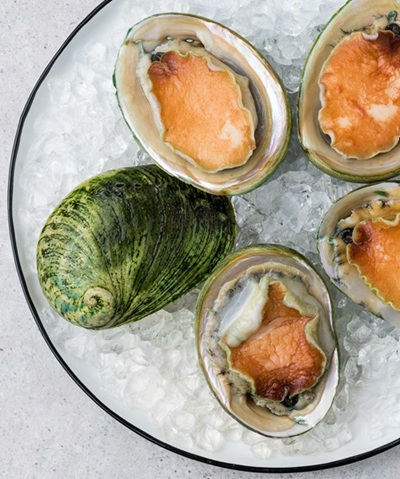

In [ ]:
# Importing required libraries
import warnings
warnings.filterwarnings('ignore')
# Suppress BokehDeprecationWarning
warnings.filterwarnings("ignore", category=UserWarning, module='bokeh')
# Suppress LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning, module='lightgbm')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor
import lightgbm as lgb

# Bokeh imports
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6, Category20
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.layouts import column, row, gridplot

# Kaggle related import
import kagglehub

# Flask API
from flask import Flask, request, jsonify

output_notebook()

In [ ]:
# Download the latest version of dataset directly from Kaggle for Abalone
pathToAbaloneData = kagglehub.dataset_download("devzohaib/estimating-the-age-of-abalone-at-a-seafood-farm")

In [ ]:
# Check if 'path' variable holds the correct path and if so fetch the data into a dataframe
try:
  dataAbalone = pd.read_csv(pathToAbaloneData + "/abalone.csv")
  print(dataAbalone.head())
except FileNotFoundError:
  print(f"Error: File not found at {pathToAbaloneData}/abalone.csv. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")

  sex  length  diameter  height  whole_wt  shucked_wt  viscera_wt  shell_wt  \
0   M   0.455     0.365   0.095    0.5140      0.2245      0.1010     0.150   
1   M   0.350     0.265   0.090    0.2255      0.0995      0.0485     0.070   
2   F   0.530     0.420   0.135    0.6770      0.2565      0.1415     0.210   
3   M   0.440     0.365   0.125    0.5160      0.2155      0.1140     0.155   
4   I   0.330     0.255   0.080    0.2050      0.0895      0.0395     0.055   

   rings   age  
0     15  16.5  
1      7   8.5  
2      9  10.5  
3     10  11.5  
4      7   8.5  


In [ ]:
# Looking at the first five rows of data
dataAbalone.head(5)

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [ ]:
# Looking at the shape of the data
dataAbalone.shape

(4177, 10)

In [ ]:
# Looking at the info of Data Types of dataAbalone
dataAbalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


<font color='green'>**Observations:**</font>
*  `sex` is of string type where as `length`,  `diameter`,  `height`,  `whole_wt`,  `shucked_wt`,  `viscera_wt`,  `shell_wt`,  `rings`, and `age` are of integer and float type.

In [ ]:
# Missing Values in the data
print(dataAbalone.isnull().sum())

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64


<font color='green'>**Observations:**</font>
* There are no null values which means we don't need to treat missing values

In [ ]:
# Let's look into data description
dataAbalone.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


<font color='green'>**Observations:**</font>
* The average `length` of abalone is `0.524mm` where as the average` diameter` is `0.408mm` and average number of `rings` is `10`.
* The variations (`standard deviations`) are relatively small for `length`, `diameter`, and `height` but larger for `whole weight`, indicating more variability in weight compared to other dimensions.
* Standard deviations for the number of `rings` and `age` are the same, suggesting direct correlation.

## <font color='navy'>Univariate Analysis</font>

### <font color='navy'>Distribution of all the continuous variables

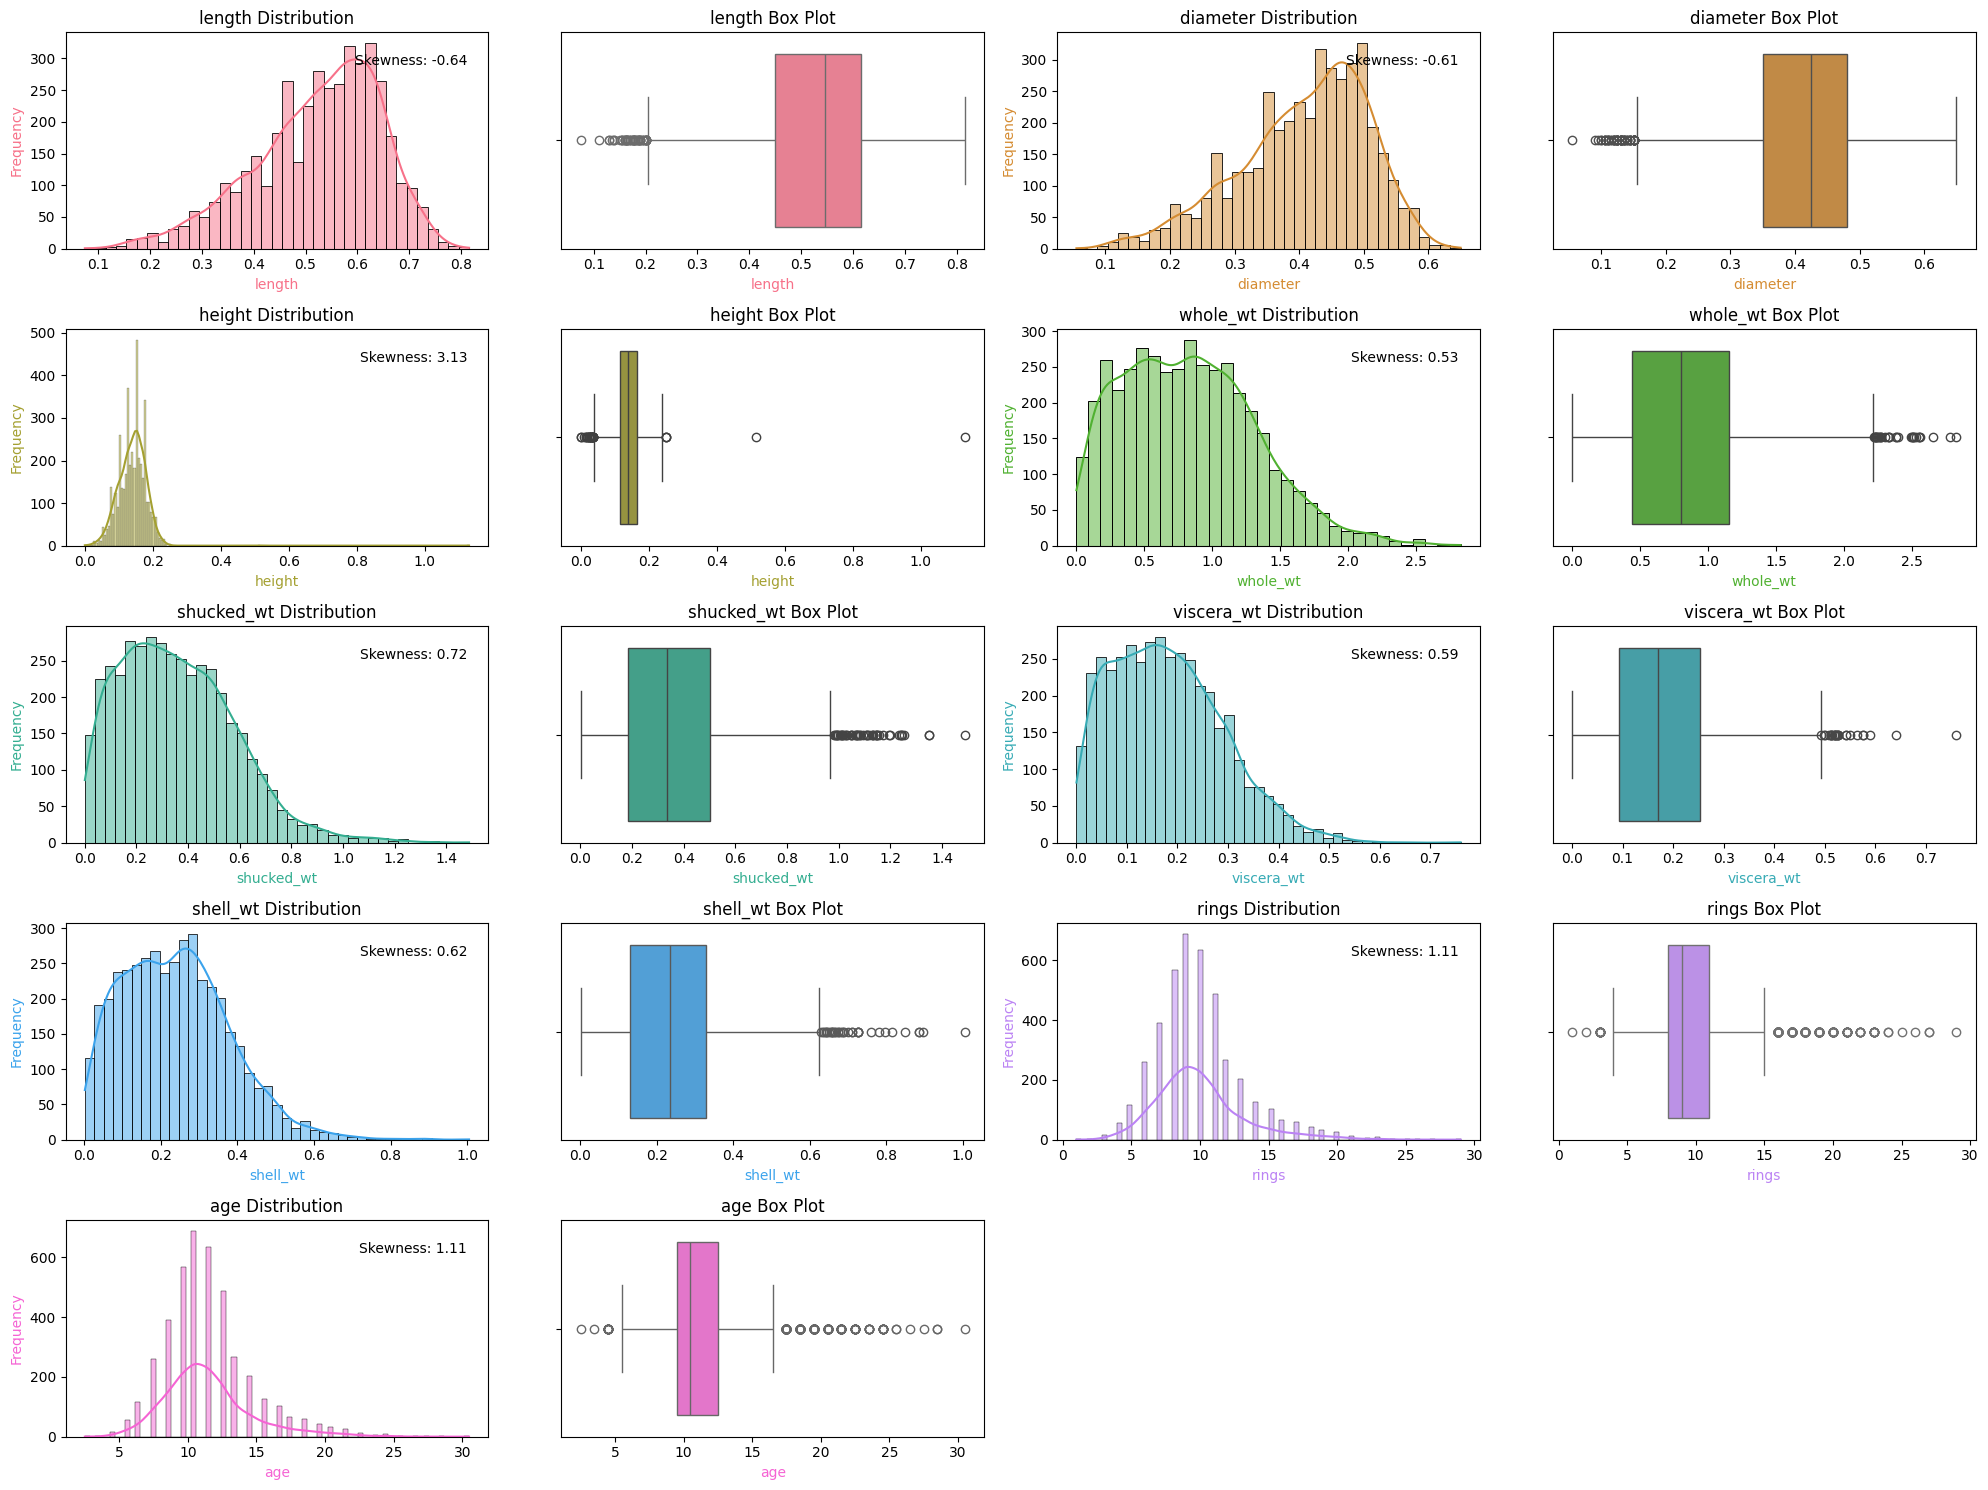

In [ ]:
# Select continuous variables
numerical_features = dataAbalone.select_dtypes(include=['number']).columns

# Color palette
palette = sns.color_palette("husl", len(numerical_features))

# Calculate skewness for numerical features
skewness = dataAbalone[numerical_features].skew()

# Determine the number of rows needed
num_features = len(numerical_features)
num_rows = (num_features * 2 + 3) // 4  # Each feature has 2 plots, rounded up

# Create subplots for histograms and box plots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 3))
axes = axes.flatten()

# Iterate through features and plot histograms and box plots
for i, feature in enumerate(numerical_features):
    # Histogram plot
    sns.histplot(dataAbalone[feature], kde=True, ax=axes[2 * i], color=palette[i])
    axes[2 * i].set_title(f'{feature} Distribution', fontsize=12)
    axes[2 * i].set_xlabel(feature, color=palette[i])
    axes[2 * i].set_ylabel('Frequency', color=palette[i])
    axes[2 * i].text(0.95, 0.85, f'Skewness: {skewness[feature]:.2f}', fontsize=10, color='black', transform=axes[2 * i].transAxes, horizontalalignment='right')

    # Box plot
    sns.boxplot(x=dataAbalone[feature], ax=axes[2 * i + 1], color=palette[i])
    axes[2 * i + 1].set_title(f'{feature} Box Plot', fontsize=12)
    axes[2 * i + 1].set_xlabel(feature, color=palette[i])

# Hide any unused subplots
for j in range(2 * num_features, len(axes)):
    axes[j].set_axis_off()

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()


<font color='green'>**Observations:**</font>

**Length and Diameter:**
* Both have negative skewness values `-0.64` and `-0.61`, respectively, indicating that the distributions are skewed to the left.

**Height:**
* Height has a high positive skewness value `3.13`, suggesting a strong right skew.

**Whole Weight, Shucked Weight, Viscera Weight, Shell Weight:**
* These weights all have positive skewness values `0.53`, `0.72`, `0.59`, and `0.62`, respectively.

**Rings and Age:**
* Both rings and age have identical positive skewness values `1.11`, indicating a right-skewed distribution.

### <font color='navy'>Distribution of category variable

In [ ]:
sex_counts = dataAbalone['sex'].value_counts().reset_index()
sex_counts.columns = ['sex', 'count']

# Create a ColumnDataSource
source = ColumnDataSource(data=sex_counts)

# Create a CategoricalColorMapper
mapper = CategoricalColorMapper(factors=sex_counts['sex'].tolist(), palette=Category20[len(sex_counts)])

# Create the figure
p = figure(x_range=sex_counts['sex'].tolist(), height=400, width=400, title="Abalone Sex Distribution",
           toolbar_location=None, tools="")

# Add a vbar glyph
p.vbar(x='sex', top='count', width=0.8, source=source, color={'field': 'sex', 'transform': mapper})

# Add hover tool with single hover
hover = HoverTool(tooltips=[("Sex", "@sex"), ("Count", "@count")], mode='vline')
p.add_tools(hover)

# Customize the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.axis.minor_tick_line_color = None
p.outline_line_color = None

# Show the plot
output_notebook()
show(p)


## <font color='navy'>Bivariate Analysis</font>

### <font color='navy'>Scatter plot for number of rings vs different physical attributes

In [ ]:
# Function to create a scatter plot
def create_scatter_plot(x_col, y_col, title, x_axis_label, y_axis_label):
    source = ColumnDataSource(data=dict(x=dataAbalone[x_col], y=dataAbalone['rings'], age=dataAbalone['age']))
    p = figure(title=title, x_axis_label=x_axis_label, y_axis_label=y_axis_label, width=300, height=300, tools="crosshair")
    p.circle('x', 'y', source=source, size=8, fill_alpha=0.6, legend_label="Rings")
    p.circle('x', 'age', source=source, size=8, fill_alpha=0.6, color='red', legend_label="Age")
    p.legend.location = "top_left"
    return p


# Create plots
plots = []
for col in ['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt']:
    plots.append(create_scatter_plot(col, 'rings', f'Rings vs {col}', col, 'Rings/Age'))

# Create a gridplot
grid = gridplot(plots, ncols=4)
show(grid)

<font color='green'>**Observations:**</font>
* **Length and Diameter**: There are upward growth trends concentrated on the higher value side of `length` and `diameter`, indicating a positive correlation with the increased number of `rings` and `age`.
* **Height**: Height shows a sharp increase and concentrated values of `rings` and `age`.
* **Weight-related Characteristics**: There are upward growth trends concentrated on the lower value side of `whole_wt`, `shucked_wt`, `viscera_wt`, and `shell_wt`, indicating a positive correlation with the increased number of `rings` and `age`.

### <font color='navy'>Correlation Matrix

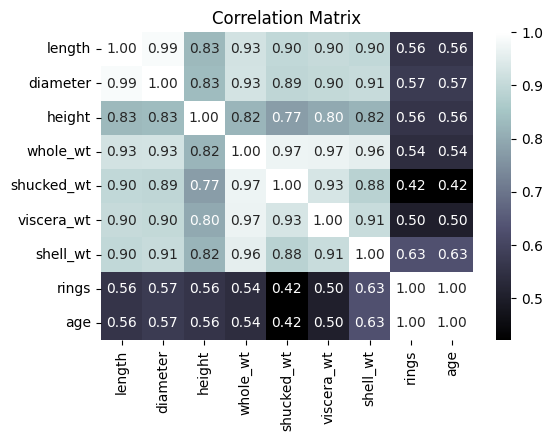

In [ ]:
# Select only continuous variables for analysis
continuous_cols = dataAbalone.select_dtypes(include=['number']).columns
dataAbalone_continuous = dataAbalone[continuous_cols]

# Correlation matrix
correlation_matrix = dataAbalone_continuous.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='bone', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<font color='green'>**Observations:**</font>
- **Length and Diameter**: As `length` and `diameter` increase, the number of `rings` and `age` tends to increase, though not as strongly as other factors.
- **Height**: The positive correlation of `height` with `rings` (0.56) suggests that `height` also increases with the number of `rings`, but to a lesser extent compared to weight-related features.
- **Rings and Age**: The perfect correlation (1.00) between the number of `rings` and age confirms that the number of `rings` is a direct measure of the abalone's `age`.
- **Shell Weight**: `shell_wt` shows the highest correlation (0.63) with the number of `rings`, indicating it might be the most reliable predictor among the physical characteristics.
- **Shucked Weight**: `shucked_wt` has the lowest correlation (0.42), suggesting it's less effective in predicting the number of `rings`.
- **Whole Weight, Viscera Weight, and Height**: These characteristics have moderate correlations with `rings`, making them decent predictors but not as strong as shell weight.

### <font color='navy'>How does weight change with age for each of the three sex categories?</font>

In [ ]:
# Group data by sex and calculate the mean weight for each age
weight_by_sex_age = dataAbalone.groupby(['sex', 'age'])['whole_wt'].mean().reset_index()

# Define colors for each sex
colors = {'M': 'blue', 'F': 'orange', 'I': 'green'}

# Create a ColumnDataSource
source = ColumnDataSource(weight_by_sex_age)

# Create a Bokeh figure
p = figure(title='Weight Change with Age by Sex', x_axis_label='Age', y_axis_label='Average Weight', width=800, height=400)

# Add hover tool
hover = HoverTool(tooltips=[("Age", "@age"), ("Avg Weight", "@whole_wt"), ("Sex", "@sex")])
p.add_tools(hover)

# Plot lines for each sex category
for sex in weight_by_sex_age['sex'].unique():
    subset = weight_by_sex_age[weight_by_sex_age['sex'] == sex]
    source_sex = ColumnDataSource(subset)
    p.line('age', 'whole_wt', source=source_sex, legend_label=sex, line_width=2, color=colors[sex], muted_color=colors[sex], muted_alpha=0.2)

# Customize plot
p.legend.title = 'Sex'
p.legend.location = 'top_left'
p.grid.grid_line_alpha = 0.3
p.legend.click_policy = "mute"

# Show plot
output_notebook()
show(p, notebook_handle=True)


### <font color='navy'>How does weight of shell affects the weight of meat and weight of whole abalone in different ages?</font>

In [ ]:
# Group data by age and calculate the mean of shell_wt, shucked_wt, and whole_wt
weight_by_age = dataAbalone.groupby('age')[['shell_wt', 'shucked_wt', 'whole_wt']].mean().reset_index()

# Create separate ColumnDataSource objects for each weight type
source_shell = ColumnDataSource(data=dict(age=weight_by_age['age'], weight=weight_by_age['shell_wt']))
source_shucked = ColumnDataSource(data=dict(age=weight_by_age['age'], weight=weight_by_age['shucked_wt']))
source_whole = ColumnDataSource(data=dict(age=weight_by_age['age'], weight=weight_by_age['whole_wt']))

# Create a Bokeh line plot figure
p = figure(title='Weight Change with Age', x_axis_label='Age', y_axis_label='Average Weight', width=500, height=400)

# Add lines for each weight type
p.line('age', 'weight', source=source_shell, legend_label='Shell Weight', line_width=2, color='blue')
p.line('age', 'weight', source=source_shucked, legend_label='Shucked Weight', line_width=2, color='red')
p.line('age', 'weight', source=source_whole, legend_label='Whole Weight', line_width=2, color='green')

# Add hover tools to each line plot
hover_shell = HoverTool(renderers=[p.renderers[0]], tooltips=[("Age", "@age"), ("Shell Weight", "@weight")])
hover_shucked = HoverTool(renderers=[p.renderers[1]], tooltips=[("Age", "@age"), ("Shucked Weight", "@weight")])
hover_whole = HoverTool(renderers=[p.renderers[2]], tooltips=[("Age", "@age"), ("Whole Weight", "@weight")])
p.add_tools(hover_shell, hover_shucked, hover_whole)

# Customize line plot
p.legend.location = 'top_left'
p.grid.grid_line_alpha = 0.3

# Create a Bokeh stacked bar chart figure
bar = figure(title='Average Weight by Age (Stacked)', x_axis_label='Age', y_axis_label='Average Weight', width=500, height=400)

# Create a ColumnDataSource for the bar chart
source_bar = ColumnDataSource(weight_by_age)

# Stack the bar chart for shell weight and shucked weight
bar.vbar_stack(['shell_wt', 'shucked_wt'], x='age', width=0.5, color=['blue', 'red'], source=source_bar, legend_label=['Shell Weight', 'Shucked Weight'], alpha=0.7)

# Add hover tool to stacked bar chart
hover_bar = HoverTool(tooltips=[("Age", "@age"),
                                ("Shell Weight", "@shell_wt"),
                                ("Shucked Weight", "@shucked_wt"),
                                ("Whole Weight", "@whole_wt")])
bar.add_tools(hover_bar)

# Customize stacked bar chart
bar.legend.location = 'top_left'
bar.grid.grid_line_alpha = 0.3

# Show both plots side by side
layout = row(p, bar)
output_notebook()
show(layout, notebook_handle=True)


##<font color='navy'>Data Preprocessing

Label Encoding category variable Sex

In [ ]:
# Create a copy of the DataFrame
dataAbalone_encoded = dataAbalone.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'sex' column
dataAbalone_encoded['sex'] = le.fit_transform(dataAbalone_encoded['sex'])

# Get the mapping of original labels to encoded values
encoding_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("\nEncoding Mapping:")
encoding_mapping


Encoding Mapping:


{'F': 0, 'I': 1, 'M': 2}

In [ ]:
# Print the encoded DataFrame and the mapping
print("Encoded DataFrame:")
dataAbalone_encoded.head()

Encoded DataFrame:


,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


##<font color='navy'>Model Building

###<font color='navy'>Spliting the Data

In [ ]:
# Separate features (X) and target variable (y)
X = dataAbalone_encoded.drop(['age', 'rings'], axis=1)
y = dataAbalone_encoded['age']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print("Shape of Train dataset: ", X_train.shape)
print("Shape of Test dataset: ", X_test.shape)

Shape of Train dataset:  (3132, 8)
Shape of Test dataset:  (1045, 8)


###<font color='navy'>Implementing StandardScaler

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###<font color='brown'>1. Linear Regression

Linear Regression attempts to find a linear relationship between the features (physical characteristics) and the target (age). It creates a linear equation where the age is predicted as a weighted sum of the input features.
- **Strengths:** Simple to understand and implement. Can be computationally efficient for large datasets.
- **Weaknesses:** Assumes a linear relationship, which might not hold true for all datasets. Sensitive to outliers.

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create a Linear Regression model
lr_model = LinearRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a table to store the results
results_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Best Hyperparameters': [best_params],
    'Mean Squared Error': [mse],
    'R-squared': [r2]
})

# Print the results table
results_df


,Model,Best Hyperparameters,Mean Squared Error,R-squared
0,Linear Regression,"{'fit_intercept': True, 'positive': False}",4.820321,0.531434


###<font color='brown'>2. Decision Tree Regression

An ensemble method that combines multiple Decision Trees. Each tree is trained on a random subset of the data and features. The final prediction is an average (or other aggregation) of the predictions from individual trees.
- **Strengths:** More robust and less prone to overfitting than a single Decision Tree. Generally achieves higher accuracy.
- **Weaknesses:** Can be computationally more expensive than a single Decision Tree. Less interpretable than a single Decision Tree.

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Create GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Append the results to the existing results DataFrame
new_row = pd.DataFrame({
    'Model': ['Decision Tree Regression'],
    'Best Hyperparameters': [best_params_dt],
    'Mean Squared Error': [mse_dt],
    'R-squared': [r2_dt]
})
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the updated results table
results_df


,Model,Best Hyperparameters,Mean Squared Error,R-squared
0,Linear Regression,"{'fit_intercept': True, 'positive': False}",4.820321,0.531434
1,Decision Tree Regression,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",6.802036,0.338798


###<font color='brown'>3. Random Forest Regression

An ensemble method that combines multiple Decision Trees. Each tree is trained on a random subset of the data and features. The final prediction is an average (or other aggregation) of the predictions from individual trees.
- **Strengths:** More robust and less prone to overfitting than a single Decision Tree. Generally achieves higher accuracy.
- **Weaknesses:** Can be computationally more expensive than a single Decision Tree. Less interpretable than a single Decision Tree.

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Append the results to the existing results DataFrame
new_row = pd.DataFrame({
    'Model': ['Random Forest Regression'],
    'Best Hyperparameters': [best_params_rf],
    'Mean Squared Error': [mse_rf],
    'R-squared': [r2_rf]
})
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the updated results table
results_df


,Model,Best Hyperparameters,Mean Squared Error,R-squared
0,Linear Regression,"{'fit_intercept': True, 'positive': False}",4.820321,0.531434
1,Decision Tree Regression,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",6.802036,0.338798
2,Random Forest Regression,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",4.638184,0.549138


###<font color='brown'>4. XGBoost Regression

Another ensemble method that uses gradient boosting. It builds a sequence of trees, where each tree tries to correct the errors of the previous trees. The model learns by iteratively improving its predictions.
- **Strengths:** Often achieves high accuracy. Handles complex relationships well. Has built-in regularization to prevent overfitting.
- **Weaknesses:** Can be computationally expensive, especially with large datasets or complex models. Requires careful hyperparameter tuning.

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an XGBoost Regressor model.  Use the scikit-learn API.
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1) # added verbose

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Create results DataFrame if it doesn't exist
try:
    results_df
except NameError:
    results_df = pd.DataFrame(columns=['Model', 'Best Hyperparameters', 'Mean Squared Error', 'R-squared'])

# Append the results to the existing results DataFrame
new_row = pd.DataFrame({
    'Model': ['XGBoost Regression'],
    'Best Hyperparameters': [best_params_xgb],
    'Mean Squared Error': [mse_xgb],
    'R-squared': [r2_xgb]
})
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the updated results table
results_df

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


,Model,Best Hyperparameters,Mean Squared Error,R-squared
0,Linear Regression,"{'fit_intercept': True, 'positive': False}",4.820321,0.531434
1,Decision Tree Regression,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",6.802036,0.338798
2,Random Forest Regression,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",4.638184,0.549138
3,XGBoost Regression,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",4.665405,0.546492


###<font color='brown'>5. LightGBM Regression
Similar to XGBoost, it is a gradient boosting framework. However, it uses a different tree-growing algorithm (leaf-wise growth instead of depth-wise) that can be more efficient and lead to faster training times.
- **Strengths:** Faster training speed compared to XGBoost, especially for large datasets. Can achieve comparable accuracy to XGBoost.
- **Weaknesses:** May be more prone to overfitting than XGBoost in some cases. Requires careful hyperparameter tuning.

In [ ]:
# Define the parameter grid for LightGBM hyperparameter tuning
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a LightGBM Regressor model
lgbm_model = lgb.LGBMRegressor(random_state=42, objective='regression', verbose=-1)

# Create GridSearchCV object
grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid_lgbm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_lgbm.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_lgbm = grid_search_lgbm.best_params_
best_lgbm_model = grid_search_lgbm.best_estimator_

# Make predictions on the test set
y_pred_lgbm = best_lgbm_model.predict(X_test)

# Evaluate the model
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Append the results to the existing results DataFrame
new_row = pd.DataFrame({
    'Model': ['LightGBM Regression'],
    'Best Hyperparameters': [best_params_lgbm],
    'Mean Squared Error': [mse_lgbm],
    'R-squared': [r2_lgbm]
})
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the updated results table
results_df

,Model,Best Hyperparameters,Mean Squared Error,R-squared
0,Linear Regression,"{'fit_intercept': True, 'positive': False}",4.820321,0.531434
1,Decision Tree Regression,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",6.802036,0.338798
2,Random Forest Regression,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",4.638184,0.549138
3,XGBoost Regression,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",4.665405,0.546492
4,LightGBM Regression,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",4.539811,0.558701


In [ ]:
results_df

,Model,Best Hyperparameters,Mean Squared Error,R-squared
0,Linear Regression,"{'fit_intercept': True, 'positive': False}",4.820321,0.531434
1,Decision Tree Regression,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",6.802036,0.338798
2,Random Forest Regression,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",4.638184,0.549138
3,XGBoost Regression,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",4.665405,0.546492
4,LightGBM Regression,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",4.539811,0.558701


##<font color='green'>Conclusion

#### **Metrics:**
The key metrics for comparison of these five different regression models are Mean Squared Error (MSE) and R-squared (R²).

* **Mean Squared Error (MSE):**  This metric represents the average squared difference between the predicted and actual ages.  Lower MSE values indicate better model performance. A lower MSE value indicates better model performance, meaning the model's predictions are closer to the true values

* **R-squared (R²):** This metric represents the proportion of variance in the abalone's age that is explained by the model.
It ranges from 0 to 1, with 1 indicating a perfect fit.  A higher R² means the model is better at capturing the relationships between the features and the age.

### **Models performance:**
1. **LightGBM Regression** emerges as the **best** performing model, having the **lowest MSE** and the **highest R-squared**.<br>
LightGBM being a gradient boosting method, often provides **faster training times** and comparable **accuracy** to XGBoost.
2. **Decision Tree Regression** performs the **worst**, with the **highest MSE** and the **lowest R-squared**. <br>This indicates that a single decision tree may not be complex enough to capture the relationships within the data.
3. **XGBoost Regression** model performs similarly to **Random Forest**,significant improvement over the Decision Tree, achieving a comparable MSE and R-squared.

### **Key Takeaways:**

- **Ensemble methods** (Random Forest, XGBoost, and LightGBM) significantly outperform the single Decision Tree model. This highlights the power of ensemble techniques in improving predictive accuracy and generalization.
- **LightGBM** emerges as the **best model** for this particular dataset and task, achieving the lowest MSE and highest R-squared. This suggests it **effectively captures** the **relationships** between the abalone's physical characteristics and its age.

### <font color='navy'>Investigate which variables are better predictors of age for abalones.</font>

In [ ]:
# Get feature importances
feature_importances = best_lgbm_model.feature_importances_

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Prepare data for Bokeh
source = ColumnDataSource(feature_importance_df)

# Create the plot
p = figure(x_range=feature_importance_df['Feature'].tolist(),
           height=350, title="Feature Importance",
           toolbar_location=None, tools="")

# Add a vbar renderer
p.vbar(x='Feature', top='Importance', width=0.9, source=source,
       line_color='white')

# Add hover tool
hover = HoverTool()
hover.tooltips = [("Feature", "@Feature"), ("Importance", "@Importance")]
p.add_tools(hover)


p.xgrid.grid_line_color = None
p.y_range.start = 0
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.major_label_orientation = 1

# Display the plot
output_notebook()
show(p)


<font color='green'>**Observations:**</font>
- **Weight-related features** (shucked_wt, shell_wt, whole_wt, viscera_wt) are the most important predictors in determining the age of abalones.

- **Dimensional features** (diameter, height, length) also contribute significantly, with diameter and height being more important than length.

- **Sex** has the least importance, suggesting that while it does have an effect, it's not as critical as the other features.

### <font color='navy'>Can you estimate an abalone's age using its physical characteristics?</font>

In [ ]:
# Function to predict abalone age using best_lgbm_model
def estimate_abalone_age(sex, length, diameter, height, whole_weight, shucked_weight, viscera_weight, shell_weight):
    # Create a DataFrame for the input features
    input_data = pd.DataFrame({
        'sex': [sex],
        'length': [length],
        'diameter': [diameter],
        'height': [height],
        'whole_wt': [whole_weight],
        'shucked_wt': [shucked_weight],
        'viscera_wt': [viscera_weight],
        'shell_wt': [shell_weight]
    })

    # Encode the sex feature using the same mapping as the training data
    input_data['sex'] = le.transform(input_data['sex'])

    # Scale the input features using the fitted scaler
    input_data_scaled = scaler.transform(input_data)

    # Predict the age using the best XGBoost model
    estimated_age = best_lgbm_model.predict(input_data_scaled)[0]

    return estimated_age

In [ ]:
# Test for Abalone with different Sex values:
estimated_age_male = estimate_abalone_age(sex='M', length=0.455, diameter=0.365, height=0.095, whole_weight=0.514, shucked_weight=0.2245, viscera_weight=0.101, shell_weight=0.15)
# Test for a Male Abalone:
estimated_age_female = estimate_abalone_age(sex='F', length=0.455, diameter=0.365, height=0.095, whole_weight=0.514, shucked_weight=0.2245, viscera_weight=0.101, shell_weight=0.15)
# Test for a Male Abalone:
estimated_age_infant = estimate_abalone_age(sex='I', length=0.455, diameter=0.365, height=0.095, whole_weight=0.514, shucked_weight=0.2245, viscera_weight=0.101, shell_weight=0.15)

print(f"Estimated age of the Male abalone: {estimated_age_male}")
print(f"Estimated age of the Female abalone: {estimated_age_female}")
print(f"Estimated age of the Infant abalone: {estimated_age_infant}")

Estimated age of the Male abalone: 10.219277240812744
Estimated age of the Female abalone: 10.257658696006855
Estimated age of the Infant abalone: 9.7475257443917


<font color ='grey'>-------------------------------------------------------------------------- END --------------------------------------------------------------------------